In [23]:
### Part 1
from sklearn_som.som import SOM
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Data points
X = np.load("points_1.npy")

In [39]:
# Scaled data : normalize and center coordinates
def prep_point_mean_std(X: np.ndarray):
    mean = X.mean(0)
    std = X.std(0)
    X_norm = (X - mean)/std
    return X_norm


X_norm = prep_point_mean_std(X)

# from sklearn.preprocessing import StandardScaler #same with a function
# scaler = StandardScaler()
# X_norm_func = scaler.fit_transform(X)

In [34]:
# Raw data
Points1_SOM = SOM(n=3, m=3, dim=40, lr=0.5, random_state=2023)
Points1_SOM.fit(X, epochs=100)

predictions_5 = Points1_SOM.predict(X)
transform_5 = Points1_SOM.transform(X)

value_min = transform_5.min(1)
print(value_min.max())

349.08536542814807


In [22]:
# Scaled data --> not good
Points1_SOM_norm = SOM(n=3, m=3, dim=40, lr=1, random_state=2023)
Points1_SOM_norm.fit(X_norm, epochs=100)

predictions_norm = Points1_SOM.predict(X_norm)
transform_norm = Points1_SOM.transform(X_norm)


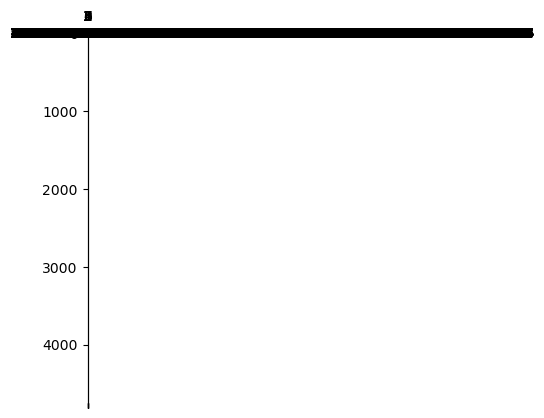

In [32]:
# Colored transform
def colored_transform(transform: np.ndarray):
    fig, ax = plt.subplots()
    min = transform.min()
    max = transform.max()
    # intersection_matrix = np.random.randint(0, 10, size=(max, max))

    ax.matshow(transform-min, cmap=plt.cm.Blues)

    for i in range(transform.shape[0]):
        for j in range(transform.shape[1]):
            ax.text(i, j, str(transform[i][j]), va='center', ha='center')
        

# colored_transform(transform_5)

In [35]:
### Part 2
from sklearn.decomposition import PCA

In [36]:
X2 = np.load("points_2.npy")

In [40]:
# Pre-process
X2_norm = prep_point_mean_std(X2)

In [44]:
pca = PCA(n_components='mle')
X2_new = pca.fit_transform(X2_norm)
var = pca.explained_variance_

pca4 = PCA(n_components=4)
X2_new_4 = pca4.fit_transform(X2_norm)